## Question 1. Run Mage

First, let's run Mage with Docker Compose. Follow the quick start guideline. 

What's the version of Mage we run? 

(You can see it in the UI)

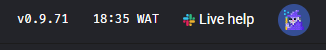

## Question 2. Creating a project

Now let's create a new project. We can call it "homework_03", for example.

How many lines are in the created `metadata.yaml` file? 

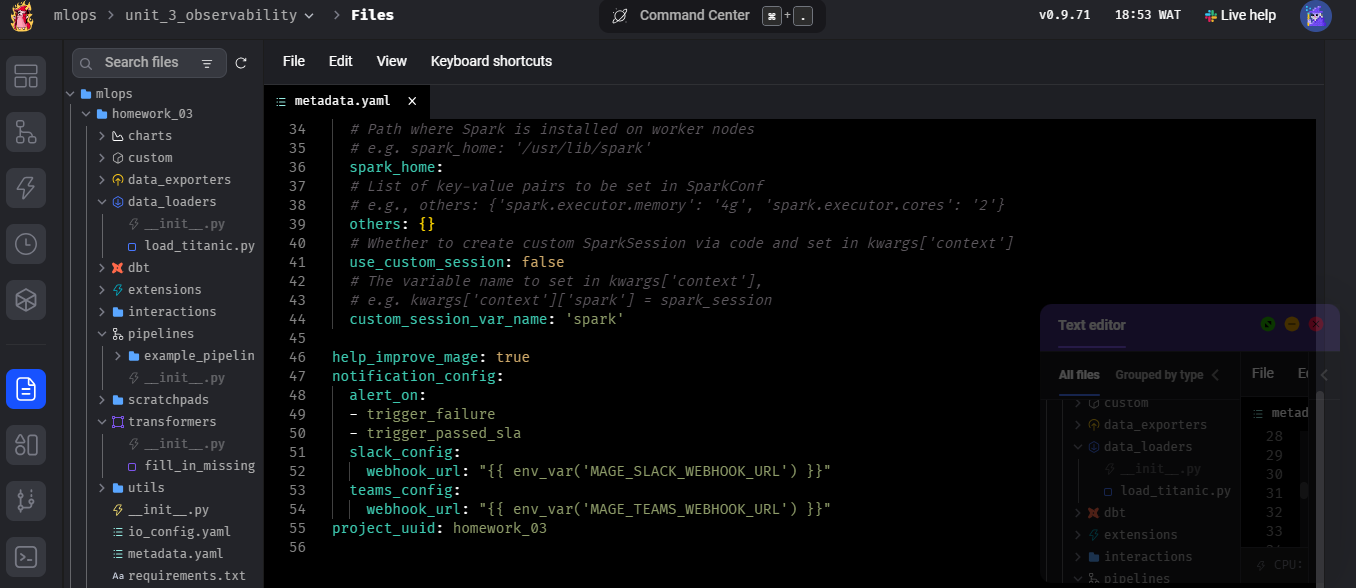

## Question 3. Creating a pipeline

Let's create an ingestion code block.

In this block, we will read the March 2023 Yellow taxi trips data.

How many records did we load? 

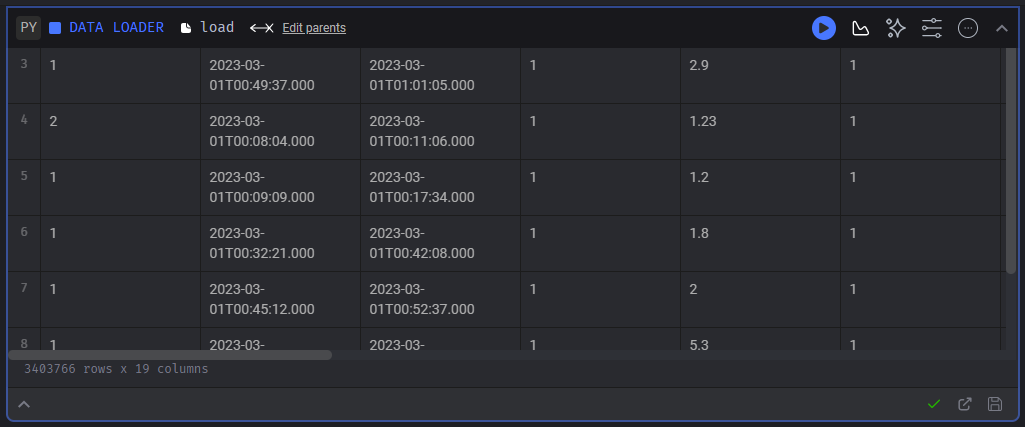

## Question 4. Data preparation


Let's use the same logic for preparing the data we used previously. We will need to create a transformer code block and put this code there.

This is what we used (adjusted for yellow dataset):

```python
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
```

Let's adjust it and apply to the data we loaded in question 3. 

What's the size of the result? 

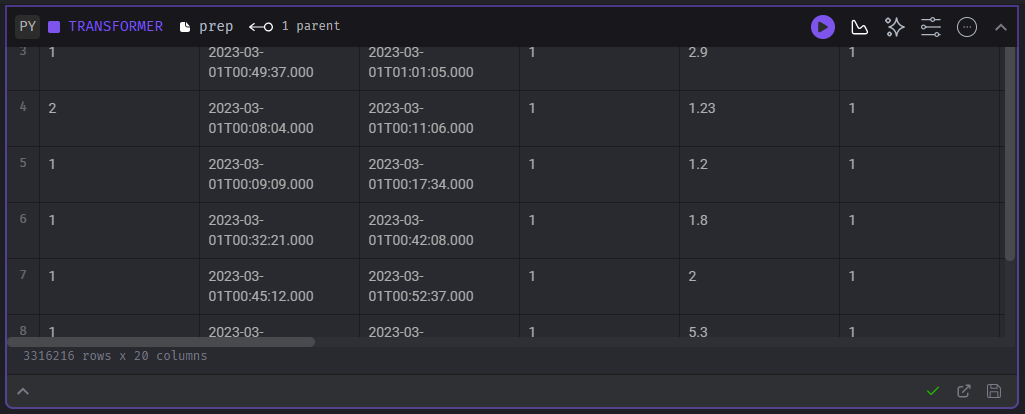

## Question 5. Train a model

We will now train a linear regression model using the same code as in homework 1

* Fit a dict vectorizer
* Train a linear regression with default parameres 
* Use pick up and drop off locations separately, don't create a combination feature

Let's now use it in the pipeline. We will need to create another transformation block, and return both the dict vectorizer and the model

What's the intercept of the model? 

Hint: print the `intercept_` field in the code block

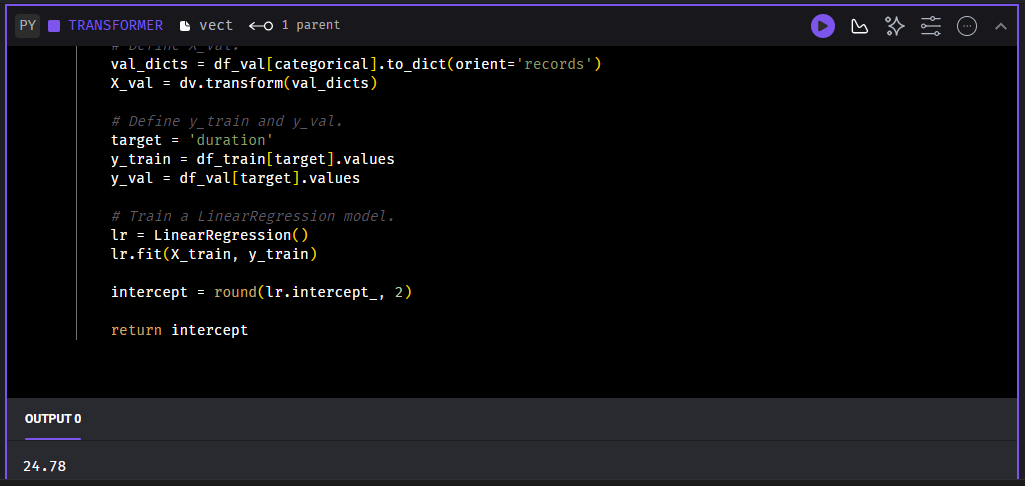

## Question 6. Register the model 

The model is trained, so let's save it with MLFlow.

If you run mage with docker-compose, stop it with Ctrl+C or 

```bash
docker-compose down
```

Let's create a dockerfile for mlflow, e.g. `mlflow.dockerfile`:

```dockerfile
FROM python:3.10-slim

RUN pip install mlflow==2.12.1

EXPOSE 5000

CMD [ \
    "mlflow", "server", \
    "--backend-store-uri", "sqlite:///home/mlflow/mlflow.db", \
    "--host", "0.0.0.0", \
    "--port", "5000" \
]
```

And add it to the docker-compose.yaml:

```yaml
  mlflow:
    build:
      context: .
      dockerfile: mlflow.dockerfile
    ports:
      - "5000:5000"
    volumes:
      - "${PWD}/mlflow:/home/mlflow/"
    networks:
      - app-network
```

Note that `app-network` is the same network as for mage and postgre containers.
If you use a different compose file, adjust it.

We should already have `mlflow==2.12.1` in requirements.txt in the mage project we created for the module. If you're starting from scratch, add it to your requirements.

Next, start the compose again and create a data exporter block.

In the block, we

* Log the model (linear regression)
* Save and log the artifact (dict vectorizer)

If you used the suggested docker-compose snippet, mlflow should be accessible at `http://mlflow:5000`.

Find the logged model, and find MLModel file. What's the size of the model? (`model_size_bytes` field):